In [6]:
#import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')

In [7]:
# prompt: load iris dataest

import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Convert the dataset to a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add a new column for the target names
iris_df['species'] = iris.target_names[iris.target]

# Print the DataFrame
print(iris_df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

In [2]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#show the number of rows and columns
iris_df.shape

(150, 5)

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


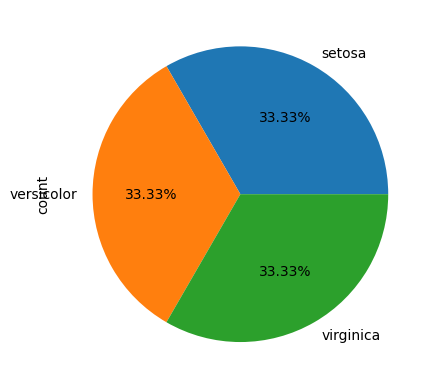

In [8]:
iris_df['species'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

In [9]:
#Checking Null Values:
print(iris_df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [10]:
# Checking Duplicates:
print(iris_df.duplicated().sum())

1


In [11]:
# prompt: drop dublication

iris_df.drop_duplicates(inplace=True)


In [12]:
#Label Encoding of objects:

#print all datatypes of objects
iris_df.select_dtypes(include=['object']).columns

Index(['species'], dtype='object')

In [13]:
from sklearn import preprocessing
label_encoding=preprocessing.LabelEncoder()
for i in iris_df.columns:
    if (iris_df[i].dtype == 'object'):
        iris_df[i]=label_encoding.fit_transform(iris_df[i])

In [14]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   species            149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [ ]:
columns = ["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"] # Removed extra space after "sepal width (cm)"
for i in columns:
    q1 = np.percentile(iris_df[i], 25)
    q3 = np.percentile(iris_df[i], 75)
    norm_range = (q3 - q1) * 1.5

    # Identify lower outliers
    lower_outliers = iris_df[iris_df[i] < (q1 - norm_range)]

    # Identify upper outliers
    upper_outliers = iris_df[iris_df[i] > (q3 + norm_range)]

    # Count the total number of outliers
    outliers = len(lower_outliers) + len(upper_outliers)

    print(f"The number of outliers in {i}: {outliers}")

    # Replace outliers with adjusted values
    iris_df[i] = np.where(iris_df[i] < (q1 - norm_range), q1 - norm_range, iris_df[i])
    iris_df[i] = np.where(iris_df[i] > (q3 + norm_range), q3 + norm_range, iris_df[i])

In [15]:
#making correlation
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.118129,0.873738,0.820620,0.786971
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal length (cm),0.873738,-0.426028,1.000000,0.962772,0.949402
petal width (cm),0.820620,-0.362894,0.962772,1.000000,0.956514
species,0.786971,-0.422987,0.949402,0.956514,1.000000


<Axes: >

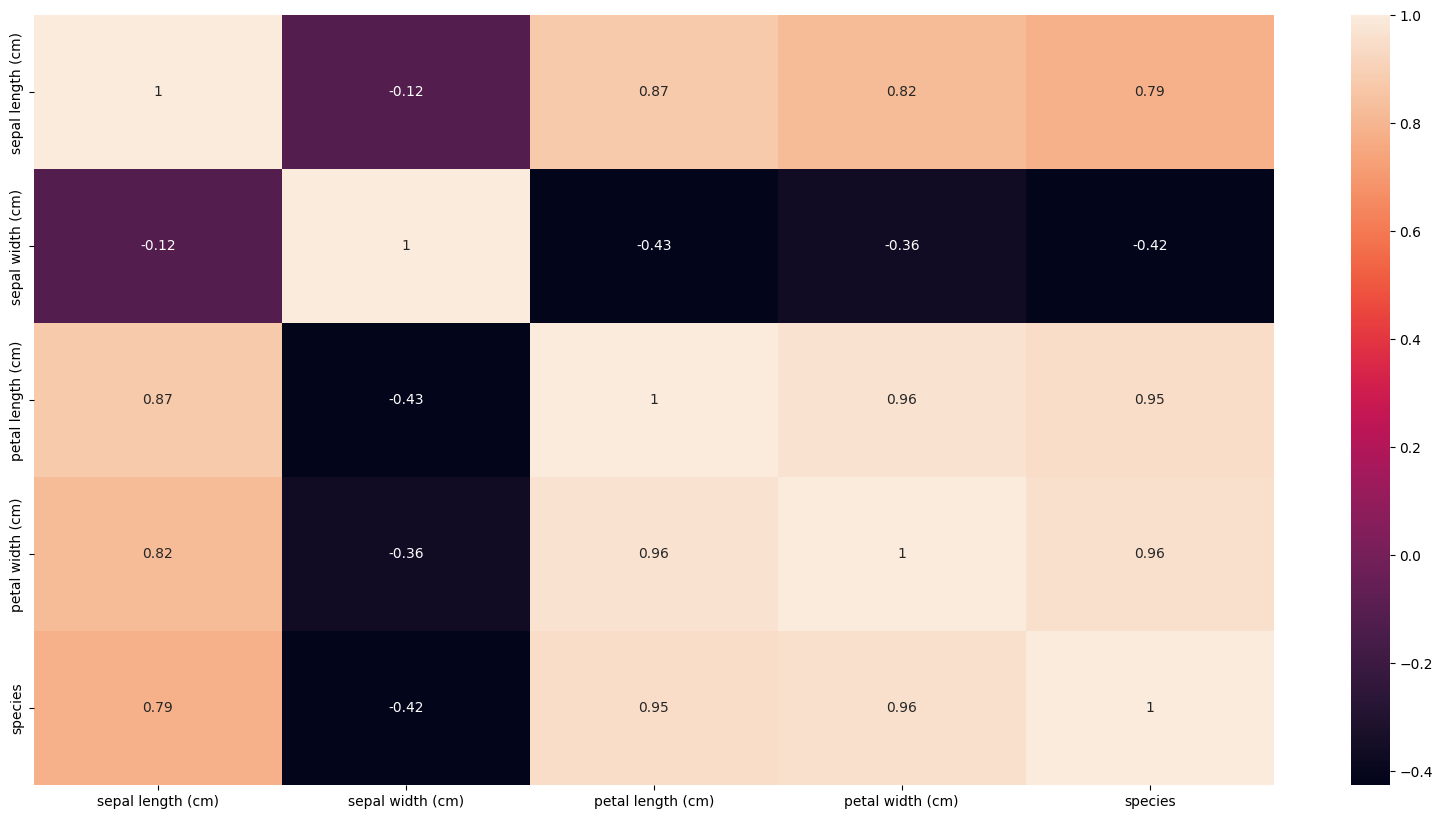

In [16]:
#making correlation on the data
fig = plt.subplots(figsize=(20, 10))
sns.heatmap(iris_df.corr(),annot = True)

In [17]:
#knowing how many columns have high or low or bad correlation
high_corr = []
low_corr = []
bad_corr = []
for col in iris_df.columns:
    relation = iris_df['species'].corr(iris_df[col])
    if(relation > 0):
        if relation >= 0.7 and relation <= 1 :
      # print(f"relation between {col} & diagnosis is high positive \n {relation}")
               high_corr.append(col)
        elif relation >= 0.4 and relation < 0.7 :
      # print(f"relation between {col} & diagnosis is low positive \n {relation}")
                 low_corr.append(col)
        else:    bad_corr.append(col)# print(f"relation between {col} & diagnosis is very low positive \n {relation}")
    else:
        if relation <= -0.7 and relation > -1 :
      # print(f"relation between {col} & diagnosis is high negative \n {relation}")
               high_corr.append(col)
        elif relation <= -0.4 and relation > -0.7 :
      # print(f"relation between {col} & diagnosis is low negative \n {relation}")
                low_corr.append(col)
        else:    bad_corr.append(col)# print(f"relation between {col} & diagnosis is very low negative \n {relation}")

print(f"the high corr are {high_corr}")
print(f"the low corr are {low_corr}")
print(f"the bad corr are {bad_corr}")

the high corr are ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)', 'species']
the low corr are ['sepal width (cm)']
the bad corr are []


In [18]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [19]:
x = iris_df.drop(columns=['species'])
y = iris_df['species']

In [20]:
#Splitting data into train & test
from sklearn.model_selection import train_test_split , GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/5, random_state = 42)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
#KNN model
wss=[]
for k in range (2,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn=knn.fit(x_train,y_train)
    s=knn.score(x_test, y_test)
    wss.append(s)

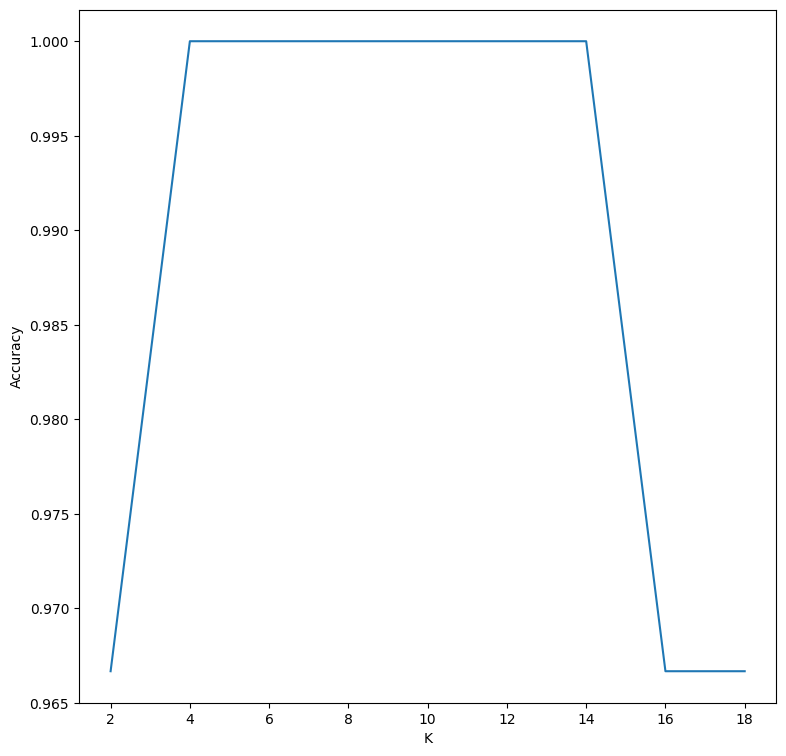

In [29]:
plt.figure(figsize=(9,9))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(range(2,20,2),wss)

In [30]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=4)
scores_knn = cross_val_score(knn, x_train, y_train, cv=10,scoring="accuracy")
print("KNN Accuracy:",scores_knn.mean()*100)

KNN Accuracy: 93.25757575757576


In [43]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [45]:
y_pred = knn.predict(x_test)
print ("accuracy= ",accuracy_score(y_pred,y_test)*100)
print (confusion_matrix(y_test,y_pred))
print (classification_report(y_test,y_pred))

accuracy=  96.66666666666667
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

